In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the datasets
train_df = pd.read_csv(r"D:\data\internship\3\Task 7\train.csv")
features_df = pd.read_csv(r"D:\data\internship\3\Task 7\features.csv")
stores_df = pd.read_csv(r"D:\data\internship\3\Task 7\stores.csv")

# Merge the datasets
df = pd.merge(train_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')
df = pd.merge(df, stores_df, on='Store', how='left')

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Resample to monthly sales
monthly_sales = df['Weekly_Sales'].resample('ME').sum()
train_df.info()
features_df.info()
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4  

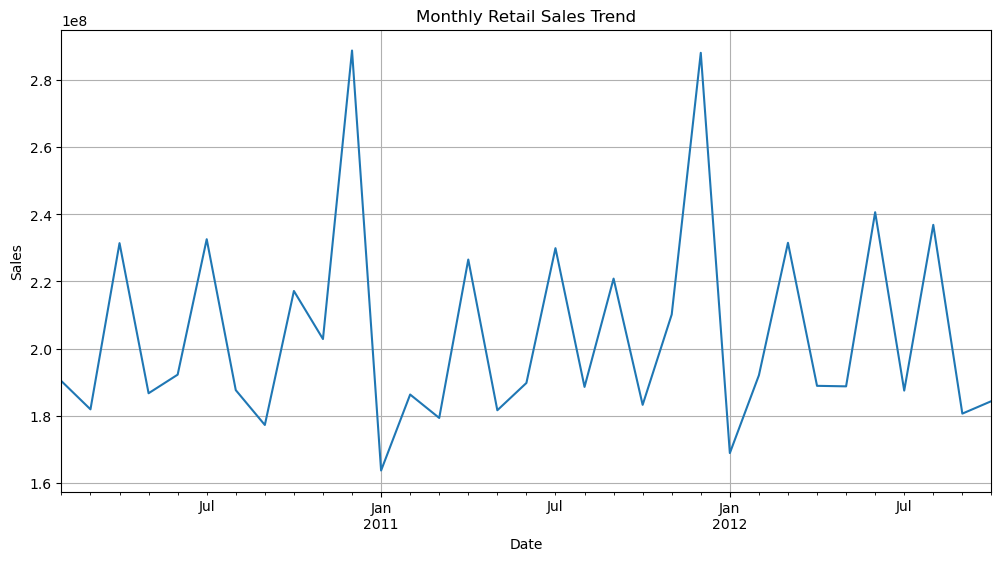

In [14]:
# Plotting the monthly sales trend
plt.figure(figsize=(12, 6))
monthly_sales.plot(title='Monthly Retail Sales Trend')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

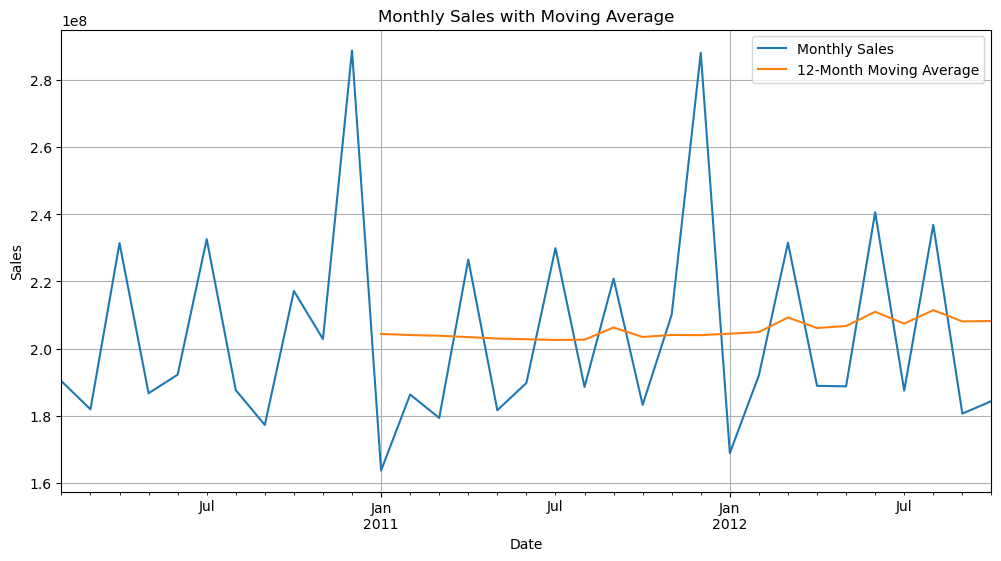

In [15]:
# Calculating and plotting moving average
moving_avg = monthly_sales.rolling(window=12).mean()
plt.figure(figsize=(12, 6))
monthly_sales.plot(label='Monthly Sales', legend=True)
moving_avg.plot(label='12-Month Moving Average', legend=True, title='Monthly Sales with Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

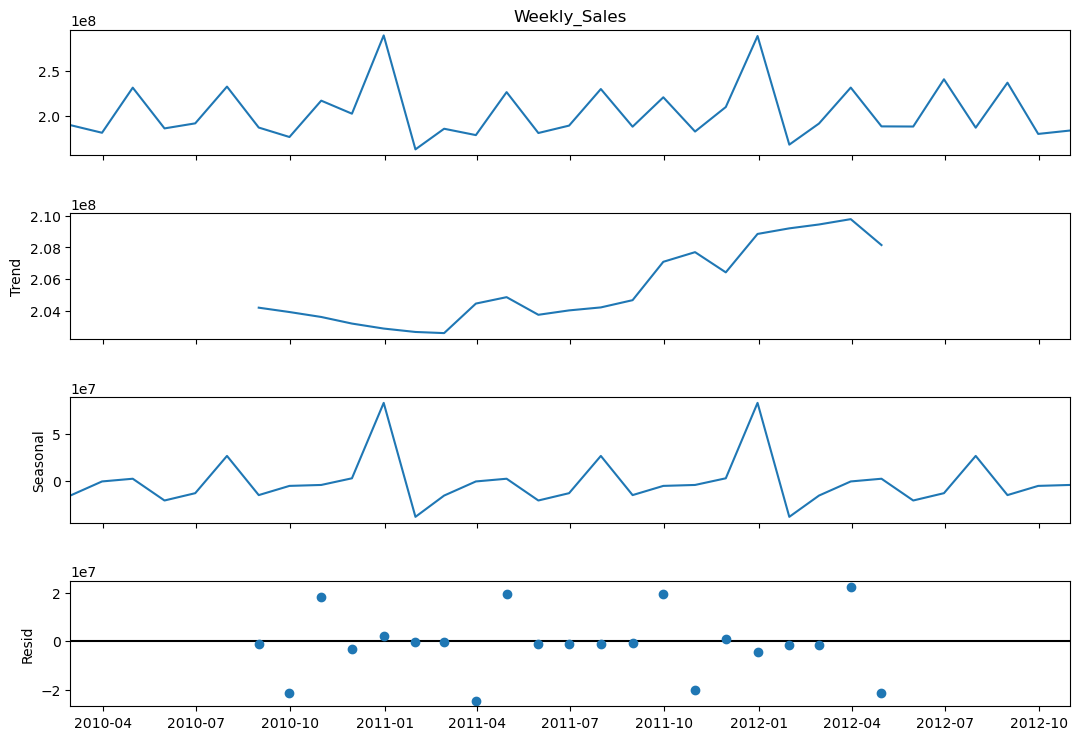

In [16]:
# Seasonal decomposition
decomposition = seasonal_decompose(monthly_sales, model='additive')
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

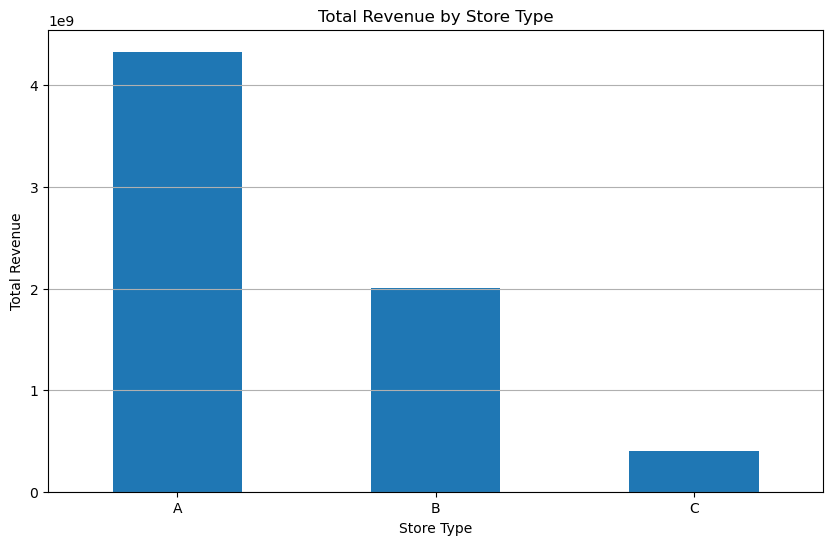

In [17]:
# Revenue breakdown by store type
revenue_by_type = df.groupby('Type')['Weekly_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
revenue_by_type.plot(kind='bar', title='Total Revenue by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

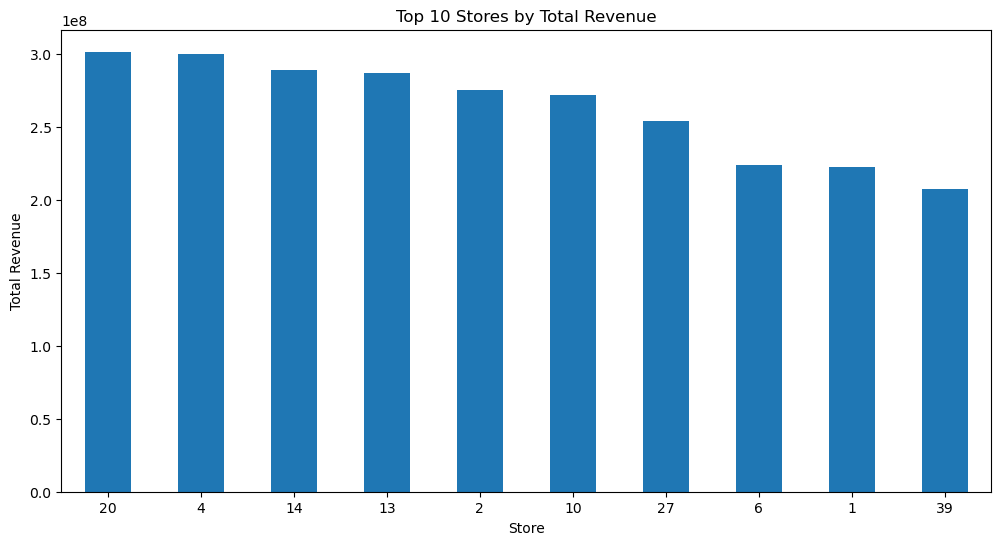

In [18]:
# Revenue breakdown by store
revenue_by_store = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
revenue_by_store.plot(kind='bar', title='Top 10 Stores by Total Revenue')
plt.xlabel('Store')
plt.ylabel('Total Revenue')
plt.xticks(rotation=0)
plt.show()

In [12]:
# Simple forecasting with rolling mean
forecast_horizon = 12 # Forecasting for the next 12 months
rolling_mean_forecast = monthly_sales.rolling(window=12).mean().iloc[-forecast_horizon:]

plt.figure(figsize=(12, 6))
monthly_sales.plot(label='Historical Monthly Sales', legend=True)
rolling_mean_forecast.plot(label='Rolling Mean Forecast', legend=True, style='--')
plt.title('Simple Sales Forecast using Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.savefig('rolling_mean_forecast.png')
plt.show()